# Data gathering

## Imports

In [1]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from matplotlib.ticker import FormatStrFormatter

params = {'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

unfiltered_data = pd.read_table('final_data_updated.csv', delimiter=',')

## Remove corrupted or invalid data

In [2]:
invalid_value_mask = np.equal(unfiltered_data, -1)
invalid_rows_mask = np.any(invalid_value_mask, axis=1)
data = unfiltered_data[~invalid_rows_mask]

## Specific projects

In [3]:
data = data.loc[data['Project'].isin(['Math', 'Time', 'Lang', 'Closure', 'Chart'])]
print(data['Project'].unique())

['Chart' 'Closure' 'Lang' 'Math' 'Time']


## Label

In [4]:
label = 'L-10'
y = data[label]

## Dataset split method

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def createTestSet(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = MinMaxScaler()
    X_train = getScaledDataset(X_train)
    X_test = getScaledDataset(X_test)
    return (X_train, X_test, y_train, y_test)

def getScaledDataset(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

# Scoring

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

X = data[['S-LineCount', 'T-CovFT', 'T-AvgVEFT']]

reps=5000

sumScore = 0
for i in range(0,reps):
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    gc= GaussianNB()
    gc.fit(X_train, y_train)
    scoreTr = gc.score(X_train, y_train)
    scoreTe = gc.score(X_test, y_test)
    sumScore += scoreTe

print("Average score on test set with {:d} repetitions:".format(reps))
print(sumScore/reps)

Average score on test set with 5000 repetitions:
0.8610523809523851


# Visualization

<IPython.core.display.Javascript object>


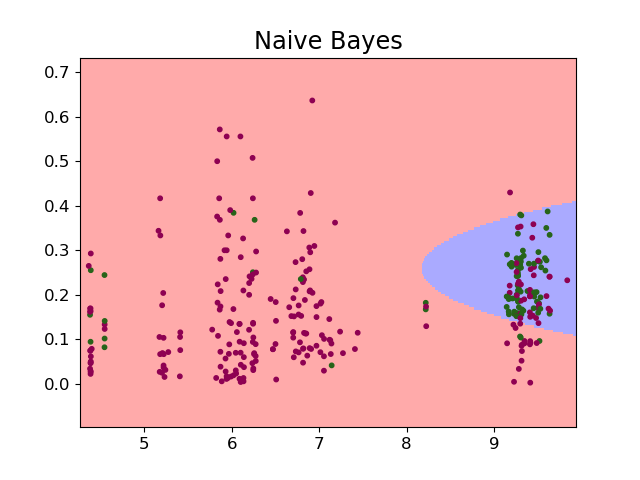

In [7]:
from matplotlib.colors import ListedColormap

X = data[['S-LineCount', 'T-CovFT']].values
h = 0.005
border = 0.1

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

gc = GaussianNB()
gc.fit(X, y)

x_min, x_max = X[:, 0].min() - border, X[:, 0].max() + border
y_min, y_max = X[:, 1].min() - border, X[:, 1].max() + border
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = gc.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PiYG, s=10);